## SPRINT 10 - Proyecto 10 "Tienda Online"

1. INTRODUCCIÓN

Al ser un analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

2. DESCRIPCIÓN DE LOS DATOS

Datos utilizados en la primera parte del proyecto


    /datasets/hypotheses_us.csv


- Hypotheses: breves descripciones de las hipótesis.
- Reach: alcance del usuario, en una escala del uno a diez.
- Impact: impacto en los usuarios, en una escala del uno al diez.
- Confidence: confianza en la hipótesis, en una escala del uno al diez.
- Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.


Datos utilizados en la segunda parte del proyecto


    /datasets/orders_us.csv


- transactionId: identificador de pedido.
- visitorId: identificador del usuario que realizó el pedido.
- date: fecha del pedido.
- revenue: ingresos del pedido.
- group: el grupo del test A/B al que pertenece el usuario.
- 


    /datasets/visits_us.csv

Nota: Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.


3. INICIALIZACIÓN 

In [1]:
# Se cargan todas las librerias necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import math as mth
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Se cargan los archivos de datos en diferentes DataFrames
hypotheses_df = pd.read_csv('/datasets/hypotheses_us.csv', ';')
orders_df = pd.read_csv('/datasets/orders_us.csv', ',')
visits_df = pd.read_csv('/datasets/visits_us.csv', ',')

In [3]:
# Se imprime la informacióin general/resumida de las descripciones de las hipótesis. 
hypotheses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
# Se imprime una muestra de las descripciones de las hipótesis. 
hypotheses_df.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [5]:
# Se imprime la información general/resumida de los datos sobre pedidos 
orders_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [6]:
# Se imprime una muestra de los datos sobre pedidos 
orders_df.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [7]:
# Se imprime la información general/resumida de los datos de las visitas 
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
# Se imprime una muestra de los datos de las visitas 
visits_df.head(10)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


3.1 PREPARACIÓN DE LOS DATOS 

In [9]:
# Confirmamos que los datos sean correctos 
print(hypotheses_df.dtypes)
print(orders_df.dtypes)
print(visits_df.dtypes)

Hypothesis    object
Reach          int64
Impact         int64
Confidence     int64
Effort         int64
dtype: object
transactionId      int64
visitorId          int64
date              object
revenue          float64
group             object
dtype: object
date      object
group     object
visits     int64
dtype: object


In [10]:
# Normalizamos los nombres
orders_df.columns = orders_df.columns.str.lower()
visits_df.columns = visits_df.columns.str.lower()
hypotheses_df.columns = hypotheses_df.columns.str.lower()

In [11]:
print(hypotheses_df.columns)
print(orders_df.columns)
print(visits_df.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')
Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')
Index(['date', 'group', 'visits'], dtype='object')


In [12]:
# Convertimos las fechas a tipo datetime 
orders_df['date'] = pd.to_datetime(orders_df['date'])
visits_df['date'] = pd.to_datetime(visits_df['date'])

In [13]:
# Revisamos si hay visitantes duplicados entre los grupos A y B

# Visitantes en el grupo A
a_users = set(orders_df[orders_df['group'] == 'A']['visitorid'])

# Visitantes en el grupo B
b_users = set(orders_df[orders_df['group'] == 'B']['visitorid'])

# Intersección (usuarios que están en ambos)
overlap_users = a_users & b_users

print(f"Número de usuarios en ambos grupos: {len(overlap_users)}")

Número de usuarios en ambos grupos: 58


Encontramos que 58 usuarios estan en ambos grupos, lo cual viola el principio de exclusividad del experimento.

Es un problema ya que si un usuario aparece en ambos grupos (A y B) puede:
- Introducir sesgos en las métricas.
- Afectar la independencia dse los grupos

Debemos eliminar esos usuarios de ambos grupos, para que no inlfuyan en los resultados. 

In [14]:
# Filtramos el DataFrame de pedidos para excluir a los usuarios duplicados
orders_clean = orders_df[~orders_df['visitorid'].isin(overlap_users)]
orders_clean.head(10)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B
10,3649131742,879864040,2019-08-15,65.7,A


In [15]:
print(f"Pedidos antes de la limpieza: {len(orders_df)}")
print(f"Pedidos después de la limpieza: {len(orders_clean)}")

Pedidos antes de la limpieza: 1197
Pedidos después de la limpieza: 1016


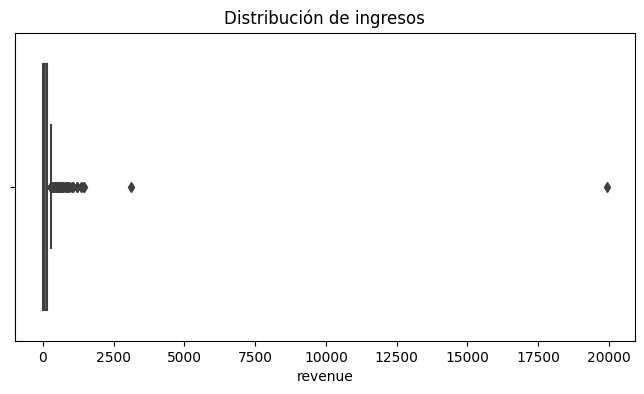

Ingreso en el percentil 95: 435.54


In [16]:
# Identificar outliers que podrían distorsionar las métricas como el ingreso promedio por pedido

# Diagrama de caja
plt.figure(figsize=(8,4))
sns.boxplot(data=orders_df, x='revenue')
plt.title("Distribución de ingresos")
plt.show()

# Umbrales de outliers (p. ej. percentil 95)
high_revenue_threshold = orders_df['revenue'].quantile(0.95)
print(f"Ingreso en el percentil 95: {high_revenue_threshold}")

In [17]:
# Verificamos si hay datos nulos o duplicados
print(hypotheses_df.isnull().sum())
print(orders_df.isnull().sum())
print(visits_df.isnull().sum())

print("Pedidos duplicados:", orders_df.duplicated().sum())
print("Visitas duplicadas:", visits_df.duplicated().sum())

hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64
transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64
date      0
group     0
visits    0
dtype: int64
Pedidos duplicados: 0
Visitas duplicadas: 0


4. ANÁLISIS DE HIPÓTESIS

4.1 Parte I. Priorizar hipótesis

El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda online con Reach, Impact, Confidence y Effort especificados para cada una.

- Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [18]:
# Creamos una nueva columna nueva llamada "ice"
hypotheses_df['ice'] = (hypotheses_df['impact'] * hypotheses_df['confidence']) / hypotheses_df['effort']

In [19]:
# Ordenamos las hipótesis por ICE (de mayor a menor prioridad)

# Ordenamos por ICE descendente
ice_sorted = hypotheses_df.sort_values(by='ice', ascending=False)

ice_sorted[['hypothesis', 'impact', 'confidence', 'effort', 'ice']]

,hypothesis,impact,confidence,effort,ice
8,Launch a promotion that gives users discounts ...,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,10,8,6,13.333333
7,Add a subscription form to all the main pages....,7,8,5,11.200000
6,Show banners with current offers and sales on ...,3,8,3,8.000000
2,Add product recommendation blocks to the store...,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,5,4,10,2.000000
5,Add a customer review page. This will increase...,2,2,3,1.333333
3,Change the category structure. This will incre...,3,3,8,1.125000
4,Change the background color on the main page. ...,1,1,1,1.000000


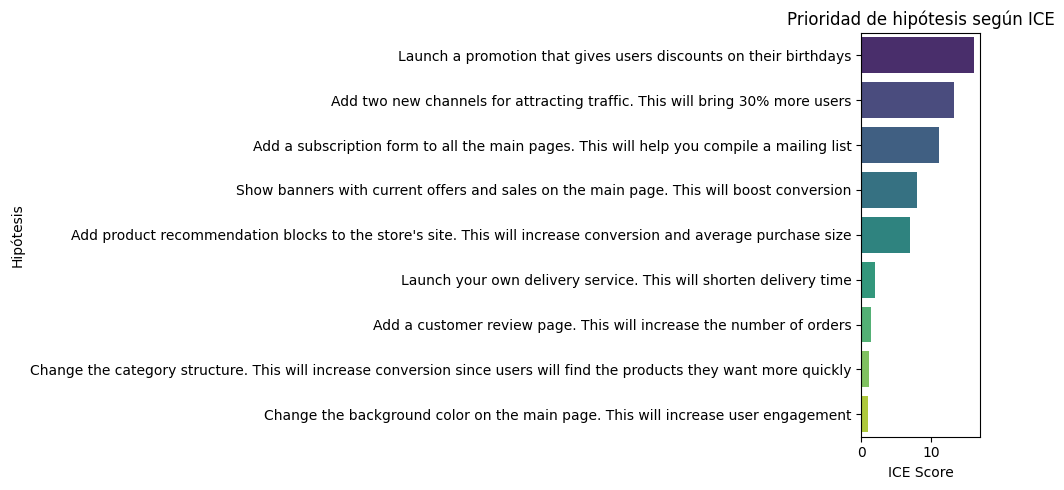

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(data=ice_sorted, x='ice', y='hypothesis', palette='viridis')
plt.title("Prioridad de hipótesis según ICE")
plt.xlabel("ICE Score")
plt.ylabel("Hipótesis")
plt.tight_layout()
plt.show()

- Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [21]:
# Calculamos RICE 
hypotheses_df['rice'] = (
    hypotheses_df['reach'] * hypotheses_df['impact'] * hypotheses_df['confidence']
) / hypotheses_df['effort']

In [22]:
# Ordenamos las hipótesis por RICE (de mayor a menor prioridad)
rice_sorted = hypotheses_df.sort_values(by='rice', ascending=False)

# Mostrar los resultados ordenados
rice_sorted[['hypothesis', 'reach', 'impact', 'confidence', 'effort', 'rice']]

,hypothesis,reach,impact,confidence,effort,rice
7,Add a subscription form to all the main pages....,10,7,8,5,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.2
3,Change the category structure. This will incre...,8,3,3,8,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,4.0
5,Add a customer review page. This will increase...,3,2,2,3,4.0
4,Change the background color on the main page. ...,3,1,1,1,3.0


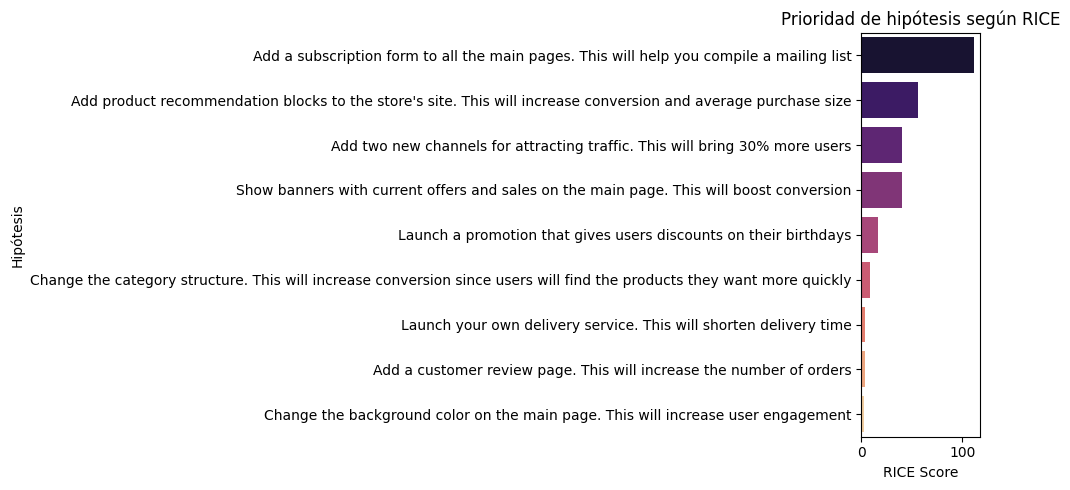

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(data=rice_sorted, x='rice', y='hypothesis', palette='magma')
plt.title("Prioridad de hipótesis según RICE")
plt.xlabel("RICE Score")
plt.ylabel("Hipótesis")
plt.tight_layout()
plt.show()

- Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [24]:
# Agregamos rankings (posición) a cada hipótesis
hypotheses_df['ice_rank'] = hypotheses_df['ice'].rank(ascending=False).astype(int)
hypotheses_df['rice_rank'] = hypotheses_df['rice'].rank(ascending=False).astype(int)

# Mostramos hipótesis con sus rankings
comparison = hypotheses_df.sort_values('rice_rank')[
    ['hypothesis', 'ice', 'ice_rank', 'rice', 'rice_rank']
]

In [25]:
# Mostramos las diferencias 

# Agregamos una columna para ver el cambio de posición
comparison['ranking_change'] = comparison['ice_rank'] - comparison['rice_rank']

# Mostramos el resultado
print(comparison)

                                          hypothesis        ice  ice_rank  \
7  Add a subscription form to all the main pages....  11.200000         3   
2  Add product recommendation blocks to the store...   7.000000         5   
0  Add two new channels for attracting traffic. T...  13.333333         2   
6  Show banners with current offers and sales on ...   8.000000         4   
8  Launch a promotion that gives users discounts ...  16.200000         1   
3  Change the category structure. This will incre...   1.125000         8   
1  Launch your own delivery service. This will sh...   2.000000         6   
5  Add a customer review page. This will increase...   1.333333         7   
4  Change the background color on the main page. ...   1.000000         9   

    rice  rice_rank  ranking_change  
7  112.0          1               2  
2   56.0          2               3  
0   40.0          3              -1  
6   40.0          3               1  
8   16.2          5              -4  
3

- Hipótesis que subieron con RICE:
  
"subscription form to all the main pages" (de 3° a 1°): No tenía el ICE más alto, pero su alto alcance hace que tenga más imoportancia. 

"product recommendation" (de 5° a 2°): Su impacto se vuelve más relevante al afectar a más usuarios.

"Change the category structure" y "Show banners with current offers" también suben ligeramente por tener mejor alcance.

- Hipótesis que bajaron con RICE:
  
"Launch a promotion that gives users discounts" (de 1° a 5°): Aunque tenía el mejor ICE, su alcance es bajo (5), por eso pierde prioridad.

"new channels for attracting traffic" también baja un poco, por la misma razón.

- Sin cambios:
  
"Change the background color on the main page" sigue siendo la menos prioritaria.

"Add a customer review page" mantiene su lugar bajo.

4.2 PARTE II. ANÁLISIS DEL TEST A/B

Se realizo una prueba A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visits_us.csv

Analiza el test A/B:

- Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [26]:
# Agrupamos ingresos por grupo y fecha
cumulative_revenue = (
    orders_clean.groupby(['date', 'group'])['revenue']
    .sum()
    .groupby(level=1)
    .cumsum()
    .reset_index()
)

# Pivotamos para tener una columna por grupo
cumulative_pivot = cumulative_revenue.pivot(index='date', columns='group', values='revenue')

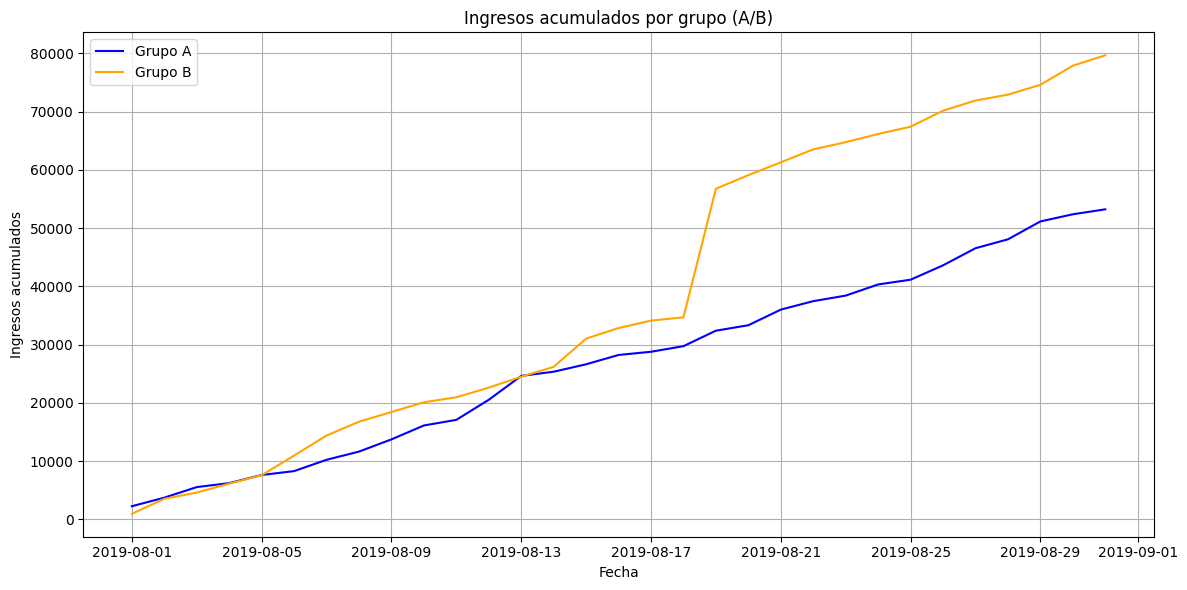

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_pivot.index, cumulative_pivot['A'], label='Grupo A', color='blue')
plt.plot(cumulative_pivot.index, cumulative_pivot['B'], label='Grupo B', color='orange')
plt.title('Ingresos acumulados por grupo (A/B)')
plt.xlabel('Fecha')
plt.ylabel('Ingresos acumulados')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos observar un pico en el grupo B despues del 17 de Agosto y despues se muestra constante lo que sugiere un aumento brusco, debemos asegurarnos si pudo haber sido causado por una compra muy grande. 

In [28]:
fecha_pico = pd.to_datetime('2019-08-18')
pedidos_pico = orders_clean[
    (orders_clean['group'] == 'B') & 
    (orders_clean['date'] == fecha_pico)
]

# Ver los ingresos ese día
pedidos_pico.sort_values(by='revenue', ascending=False)

,transactionid,visitorid,date,revenue,group
266,2012012971,1516351054,2019-08-18,225.5,B
268,3897826085,3927376365,2019-08-18,165.8,B
228,691299586,392419518,2019-08-18,50.5,B
238,460968028,3508047169,2019-08-18,50.2,B
251,2765625299,1967247027,2019-08-18,50.1,B
283,3641100475,1579036099,2019-08-18,20.9,B
270,1731627062,1100237501,2019-08-18,5.5,B


Los pedidos de 225.5 y el de 165.8 son notablemente más altos que el resto.

La diferencia en ingresos acumulados entre A y B se amplía bruscamente porque hay pedidos aislados con montos altos.

Este comportamiento no es constante y puede ser aleatorio, así que no se puede concluir aún que B es mejor solo por eso.

- Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

In [29]:
# Agrupamos por fecha y grupo, y calculamos el ingreso promedio por pedido diario
avg_order_daily = orders_clean.groupby(['date', 'group']).agg({'revenue': 'mean'}).reset_index()

# Creamos columnas acumuladas para el promedio de pedidos por grupo
group_a = avg_order_daily[avg_order_daily['group'] == 'A'].copy()
group_b = avg_order_daily[avg_order_daily['group'] == 'B'].copy()

# Calculamos promedio acumulado (sumatoria acumulada de ingresos / número de días transcurridos)
group_a['avg_cum'] = group_a['revenue'].expanding().mean()
group_b['avg_cum'] = group_b['revenue'].expanding().mean()

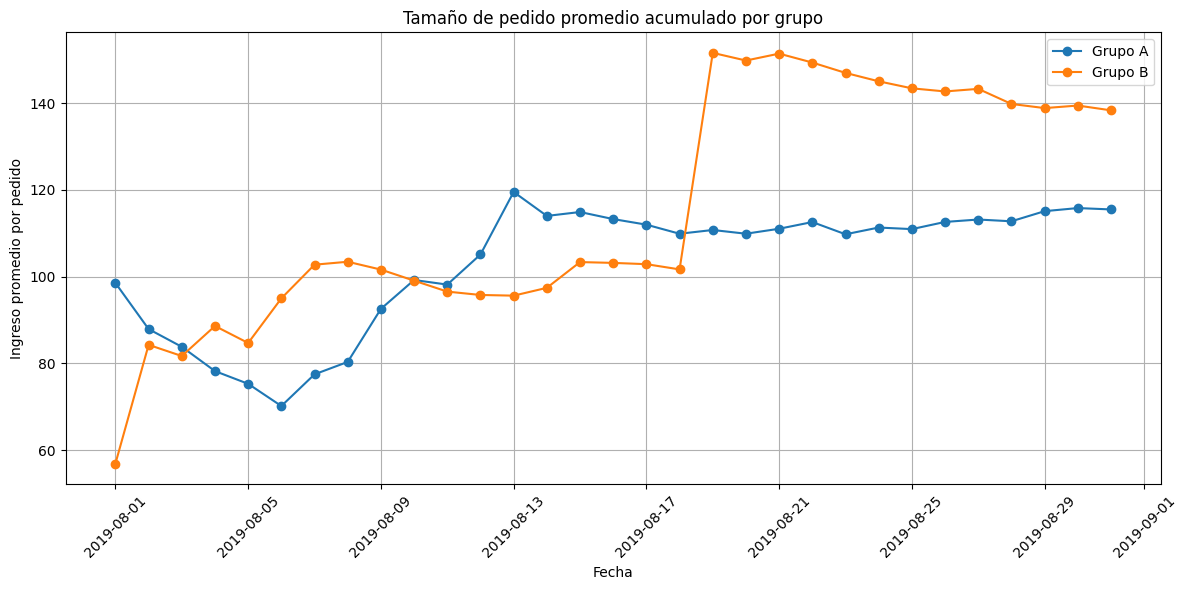

In [30]:
plt.figure(figsize=(12,6))
plt.plot(group_a['date'], group_a['avg_cum'], label='Grupo A', marker='o')
plt.plot(group_b['date'], group_b['avg_cum'], label='Grupo B', marker='o')
plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso promedio por pedido')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El grupo B comineza a diferenciarse a partir del 18 de agosto, coincidiendo con el pico en los ingresos que discutimos en el ejercicio anterior lo que sugiere que algunos usuarios realizaron pedidos significativamente altos lo que elevo el ingreso acumulado.

A lo largo del tiempo, el grupo B mantiene un tamaño de pedido promedio acumulado consistente mayor que el grupo A. 

Si al grupo B se le aplico alguna mejora (promoción, etc.) podria estar incentivando compras de mayor valor.

- Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

In [31]:
# Agrupamos pedidos por fecha y grupo, calculamos ingresos y cantidad de pedidos diarios
cumulative_revenue = orders_clean.groupby(['date', 'group']).agg({'revenue': ['sum', 'count']})
cumulative_revenue.columns = ['revenue_sum', 'order_count']
cumulative_revenue = cumulative_revenue.reset_index()

# Creamos dataframes separados por grupo
a_data = cumulative_revenue[cumulative_revenue['group'] == 'A'].copy()
b_data = cumulative_revenue[cumulative_revenue['group'] == 'B'].copy()

# Confirmamos que las fechas estén ordenadas
a_data = a_data.sort_values(by='date')
b_data = b_data.sort_values(by='date')

# Calculamos acumulados
a_data['cum_revenue'] = a_data['revenue_sum'].cumsum()
a_data['cum_orders'] = a_data['order_count'].cumsum()
b_data['cum_revenue'] = b_data['revenue_sum'].cumsum()
b_data['cum_orders'] = b_data['order_count'].cumsum()

# Calculamos tamaño de pedido promedio acumulado
a_data['avg_order'] = a_data['cum_revenue'] / a_data['cum_orders']
b_data['avg_order'] = b_data['cum_revenue'] / b_data['cum_orders']

# Confirmamos que las fechas coincidan para poder comparar
merged = a_data[['date', 'avg_order']].merge(
    b_data[['date', 'avg_order']],
    on='date',
    suffixes=('_a', '_b')
)
# Calculamos la diferencia relativa entre grupos
merged['relative_diff'] = (merged['avg_order_b'] - merged['avg_order_a']) / merged['avg_order_a']

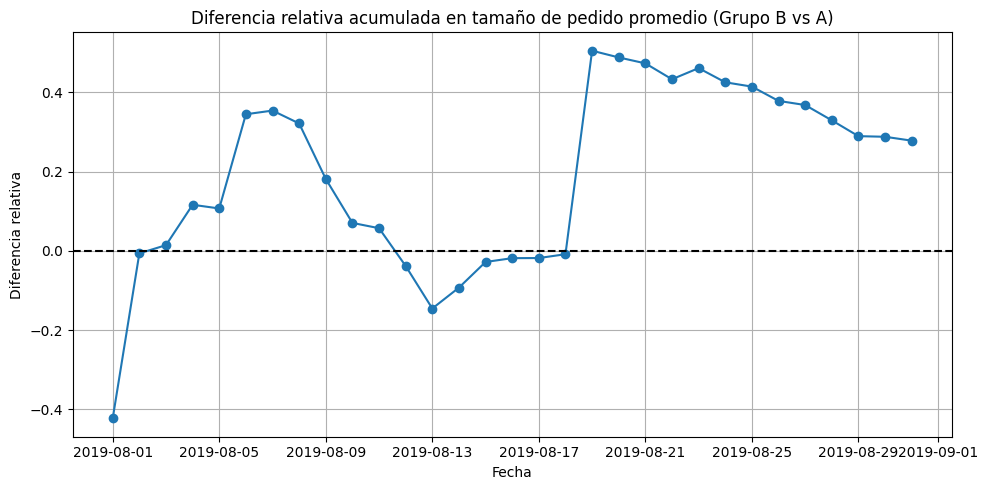

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(merged['date'], merged['relative_diff'], marker='o')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Diferencia relativa acumulada en tamaño de pedido promedio (Grupo B vs A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.grid(True)
plt.tight_layout()
plt.show()

La diferencia entre los grupos es evidente, sin embargo: 

El grupo B muestra tendencia en tener un tamaño de pedido acumulado más grande que el grupo A. 

La diferencia se vuelve positiva y "sostenida" a partir del 18 de agosto, todo parece indicar que la intervención realizada a partir de esa fecha resultó efectiva.

- Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca tus conclusiones y haz conjeturas.

In [33]:
# Calculamos el número de pedidos por grupo y día
orders_daily = orders_clean.groupby(['date', 'group']).agg({'transactionid': 'count'}).reset_index()
orders_daily.columns = ['date', 'group', 'orders']

# Calculamos visitas por grupo y día
visits_daily = visits_df.groupby(['date', 'group']).agg({'visits': 'sum'}).reset_index()

# Combinamos pedidos y visitas
conversion = pd.merge(orders_daily, visits_daily, on=['date', 'group'])

# Calculamos tasa de conversión
conversion['conversion_rate'] = conversion['orders'] / conversion['visits']

# Separamos por grupo
a_conversion = conversion[conversion['group'] == 'A']
b_conversion = conversion[conversion['group'] == 'B']

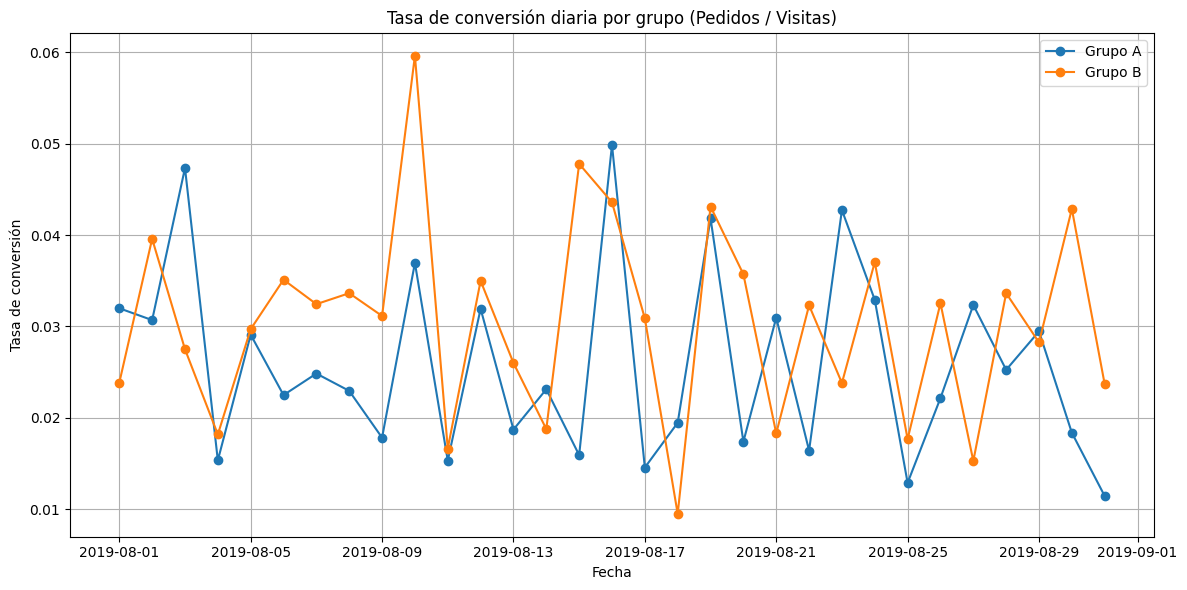

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(a_conversion['date'], a_conversion['conversion_rate'], label='Grupo A', marker='o')
plt.plot(b_conversion['date'], b_conversion['conversion_rate'], label='Grupo B', marker='o')
plt.title('Tasa de conversión diaria por grupo (Pedidos / Visitas)')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

El grupo B muestra una tasa de conversión más alta en varios días, especialmente después del 18 de Agosto. 

Al inicio de la tabla se muestran variaciones en las tasas de conversión, esto puede ser por falta de datos diarios. 

- Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

In [35]:
orders_per_user = orders_clean.groupby(['visitorid', 'group'])['transactionid'].count().reset_index()
orders_per_user.columns = ['visitorid', 'group', 'orders']

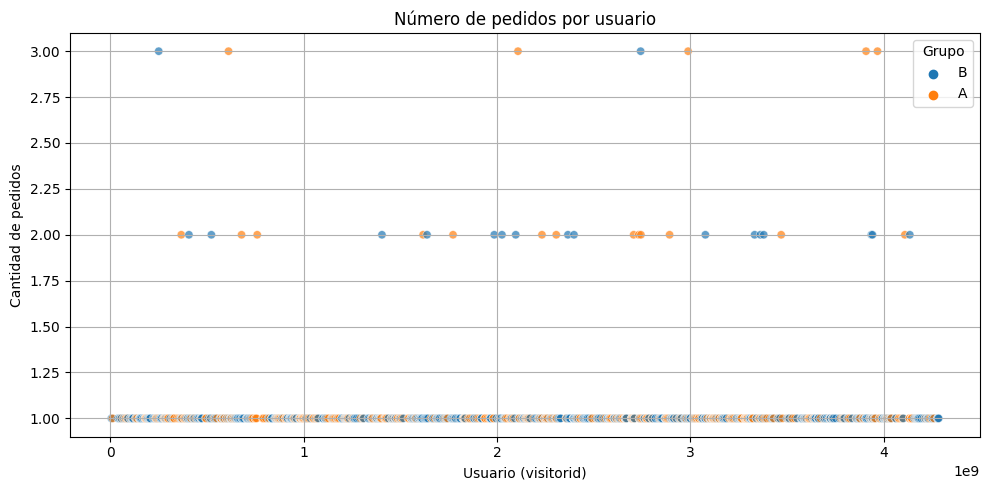

In [36]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=orders_per_user, x='visitorid', y='orders', hue='group', alpha=0.7)
plt.title('Número de pedidos por usuario')
plt.xlabel('Usuario (visitorid)')
plt.ylabel('Cantidad de pedidos')
plt.legend(title='Grupo')
plt.grid(True)
plt.tight_layout()
plt.show()

La mayoria de los usuarios hicieron un solo pedido, pero ahora nos preguntamos si hubo usuarios que hicieron dos o más pedidos, lo cual puede sesgar el promedio 

In [37]:
# Filtramos usuarios con más de un pedido
users_multiple_orders = orders_per_user[orders_per_user['orders'] > 1]
print(f"Usuarios con más de un pedido: {len(users_multiple_orders)}")
display(users_multiple_orders.sort_values(by='orders', ascending=False))

Usuarios con más de un pedido: 36


,visitorid,group,orders
55,249864742,B,3
632,2742574263,B,3
908,3967698036,A,3
138,611059232,A,3
890,3908431265,A,3
478,2108163459,A,3
687,2988190573,A,3
780,3332057097,B,2
634,2744017357,A,2
664,2892265953,A,2


In [38]:
users_multiple_orders['group'].value_counts()

B    18
A    18
Name: group, dtype: int64

Debemos responder la incognita de si es importante si hay multiples pedidos por un usuario, si esto ocurre puede romper la independencia de los datos ya que el comportamiento de estos usuarios pesa más en el resultado de las ordenes. 

Se espera usualmente que cada usuario cuente una sola vez, sobre todo si hay desequilibrio entre los grupos, pero en nuestro caso encontramos que tanto el grupo A y grupo B tienen 18 usuarios con multiples pedidos. Ahora podemos decir que existe un balance entre grupos ya que no hay un sesgo a favor de uno u otro.

- Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [39]:
# Contamos el número de pedidos por usuario
orders_per_user = orders_clean.groupby('visitorid', as_index=False).agg({'transactionid': 'count'})

orders_per_user.columns = ['visitorid', 'orders']

In [40]:
# Calculamos los percentiles 95 y 99
percentiles = np.percentile(orders_per_user['orders'], [95, 99])

print(f"Percentil 95: {percentiles[0]}")
print(f"Percentil 99: {percentiles[1]}")

Percentil 95: 1.0
Percentil 99: 2.0


El 95 % de los usuarios hicieron 1 pedido o menos.

El 99 % hicieron 2 pedidos o menos.

Casi todos los usuarios hicieron un solo pedido durante el periodo del experimento, solo un pequeño grupo hizo 2 pedidos o más.

Usuarios con más de 2 pedidos se pueden considerar anómalos o atípicos, ya que representan solo el 1 % o menos de la muestra.

- Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

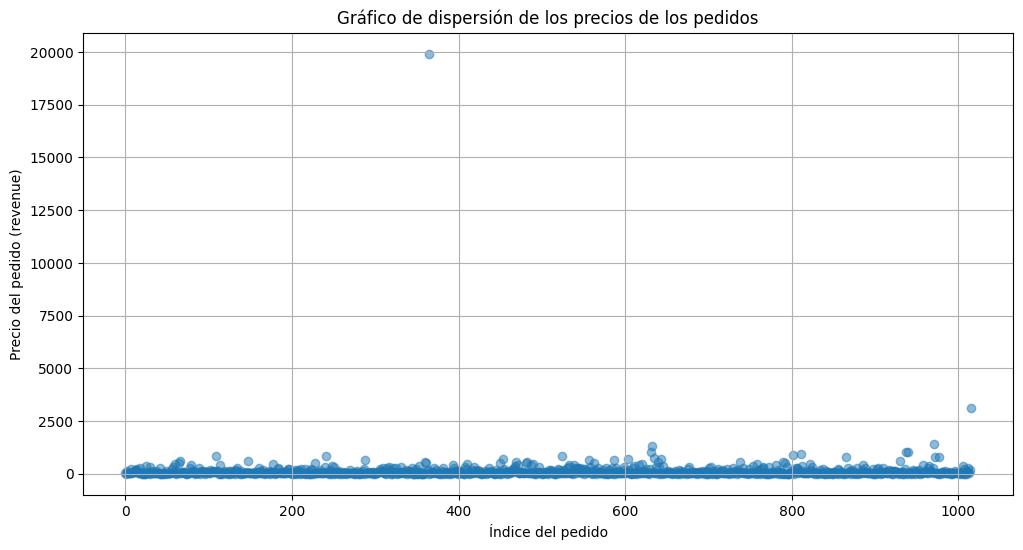

In [41]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(orders_clean)), orders_clean['revenue'], alpha=0.5)
plt.title('Gráfico de dispersión de los precios de los pedidos')
plt.xlabel('Índice del pedido')
plt.ylabel('Precio del pedido (revenue)')
plt.grid(True)
plt.show()

La mayoría de los pedidos tienen un valor bajo o "moderado", hay pocos puntos altos que se consideran como outliers que podrian afectar el promedio.

Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [42]:
# Calculamos percentiles 95 y 99 de los precios de pedidos
percentil_95 = orders_clean['revenue'].quantile(0.95)
percentil_99 = orders_clean['revenue'].quantile(0.99)

print(f"Percentil 95: {percentil_95:.2f}")
print(f"Percentil 99: {percentil_99:.2f}")

Percentil 95: 414.27
Percentil 99: 830.30


El 95 % de los pedidos tienen un precio menor a $414.27

El 99 % de los pedidos están por debajo de $830.30

- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [43]:
# Visitas por grupo
visits_per_group = visits_df.groupby('group')['visits'].sum()

# Total de pedidos por grupo
orders_per_group = orders_clean.groupby('group')['transactionid'].count()

# Prueba de proporciones
successes = np.array([orders_per_group['A'], orders_per_group['B']])
trials = np.array([visits_per_group['A'], visits_per_group['B']])

z_stat, p_value = proportions_ztest(successes, trials, alternative='two-sided')

print(f"Pedidos por grupo:\n{orders_per_group}\n")
print(f"Visitas por grupo:\n{visits_per_group}\n")
print(f'Estadístico Z: {z_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

Pedidos por grupo:
group
A    468
B    548
Name: transactionid, dtype: int64

Visitas por grupo:
group
A    18736
B    18916
Name: visits, dtype: int64

Estadístico Z: -2.3899
Valor p: 0.0169


El grupo B logró una tasa de conversión significativamente mayor que el grupo A.
Esto sugiere que el cambio aplicado al grupo B (promoción, etc.) tuvo un efecto positivo en la probabilidad de que los visitantes hicieran una compra.

- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [44]:
# Percentil 95 para filtrar outliers en los datos brutos
percentil_95_brutos = orders_df['revenue'].quantile(0.95)

# Filtramos ingresos por debajo del percentil 95 para evitar outliers extremos
orders_filtered_brutos = orders_df[orders_df['revenue'] <= percentil_95_brutos]

# Separamos ingresos por grupo
rev_A_brutos = orders_filtered_brutos[orders_filtered_brutos['group'] == 'A']['revenue']
rev_B_brutos = orders_filtered_brutos[orders_filtered_brutos['group'] == 'B']['revenue']

# Test Mann-Whitney U con datos brutos
stat_brutos, p_value_brutos = stats.mannwhitneyu(rev_A_brutos, rev_B_brutos, alternative='two-sided')

print(f'\nEstadístico U (datos brutos): {stat_brutos}')
print(f'Valor p (datos brutos): {p_value_brutos:.4f}')

if p_value_brutos < 0.05:
    print("La diferencia en el tamaño promedio de pedido entre los grupos es estadísticamente significativa (datos brutos).")
else:
    print("No hay evidencia estadística suficiente para afirmar que el tamaño promedio de pedido difiere entre los grupos (datos brutos).")


Estadístico U (datos brutos): 159559.0
Valor p (datos brutos): 0.8092
No hay evidencia estadística suficiente para afirmar que el tamaño promedio de pedido difiere entre los grupos (datos brutos).


Estadístico U (datos brutos): 159559.0
Valor p (datos brutos): 0.8092
No hay evidencia estadística suficiente para afirmar que el tamaño promedio de pedido difiere entre los grupos (datos brutos).

El valor p (0.8092) es mucho mayor que 0.05, por lo que no hay evidencia para afirmar que exista una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos A y B.

Esto indica que la presencia de usuarios en ambos grupos no está alterando el resultado de este análisis específico.

- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [45]:
# Separamos ingresos por grupo
rev_A = orders_clean[orders_clean['group'] == 'A']['revenue']
rev_B = orders_clean[orders_clean['group'] == 'B']['revenue']

print('Grupo A:')
print(rev_A.describe())
print('\nGrupo B:')
print(rev_B.describe())

# Test Mann-Whitney U para diferencia en tamaño de pedido
stat, p_value = stats.mannwhitneyu(rev_A, rev_B, alternative='two-sided')

print(f'\nEstadístico U: {stat}')
print(f'Valor p: {p_value:.4f}')

if p_value < 0.05:
    print("La diferencia en el tamaño promedio de pedido entre los grupos es estadísticamente significativa.")
else:
    print("No hay evidencia estadística suficiente para afirmar que el tamaño promedio de pedido difiere entre los grupos.")

Grupo A:
count     468.000000
mean      113.700855
std       171.372117
min         5.000000
25%        20.300000
50%        50.100000
75%       131.925000
max      1425.800000
Name: revenue, dtype: float64

Grupo B:
count      548.000000
mean       145.348905
std        868.228227
min          5.100000
25%         20.800000
50%         45.900000
75%        125.200000
max      19920.400000
Name: revenue, dtype: float64

Estadístico U: 129041.5
Valor p: 0.8622
No hay evidencia estadística suficiente para afirmar que el tamaño promedio de pedido difiere entre los grupos.


Por lo tanto, no hay evidencia estadística para rechazar la hipótesis nula de que el tamaño promedio de pedido es igual entre los grupos A y B.

En otras palabras, el cambio aplicado al grupo B no produjo una diferencia significativa en el tamaño promedio de pedido comparado con el grupo A.

La conclusión es robusta: el cambio aplicado al grupo B no afecta el tamaño promedio de pedido, ya sea que uses datos brutos o limpios.

- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [46]:
# Filtramos outliers en revenue por percentil 95
percentil_95_clean = orders_clean['revenue'].quantile(0.95)
orders_filtered_clean = orders_clean[orders_clean['revenue'] <= percentil_95_clean]

# Separamos ingresos por grupo
rev_A_clean = orders_filtered_clean[orders_filtered_clean['group'] == 'A']['revenue']
rev_B_clean = orders_filtered_clean[orders_filtered_clean['group'] == 'B']['revenue']

# Estadísticas descriptivas 
print('Grupo A (filtrados):')
print(rev_A_clean.describe())

print('\nGrupo B (filtrados):')
print(rev_B_clean.describe())

# Prueba de Mann-Whitney U
stat_clean, p_value_clean = stats.mannwhitneyu(
    rev_A_clean,
    rev_B_clean,
    alternative='two-sided'
)

print(f'\nEstadístico U (filtrados): {stat_clean}')
print(f'Valor p (filtrados): {p_value_clean:.4f}')

if p_value_clean < 0.05:
    print("La diferencia en el tamaño promedio de pedido entre los grupos es estadísticamente significativa (datos filtrados).")
else:
    print("No hay evidencia estadística suficiente para afirmar que el tamaño promedio de pedido difiere entre los grupos (datos filtrados).")

Grupo A (filtrados):
count    446.000000
mean      83.094843
std       88.869746
min        5.000000
25%       20.300000
50%       45.550000
75%      110.475000
max      410.500000
Name: revenue, dtype: float64

Grupo B (filtrados):
count    519.000000
mean      78.334682
std       85.116019
min        5.100000
25%       20.800000
50%       45.200000
75%      100.200000
max      410.500000
Name: revenue, dtype: float64

Estadístico U (filtrados): 117213.5
Valor p (filtrados): 0.7324
No hay evidencia estadística suficiente para afirmar que el tamaño promedio de pedido difiere entre los grupos (datos filtrados).


No se encuentra diferencia estadísticamente significativa entre los tamaños promedio de pedido de los grupos A y B tras eliminar:

A los usuarios presentes en ambos grupos

Los pedidos más altos (outliers) según el percentil 95

5. CONCLUSIONES

He optado por la decisión 2: detener la prueba y concluir que no existen diferencias significativas entre los grupos.

Tras analizar la tasa de conversión y el tamaño promedio de pedido considerando:

Datos brutos.

Datos sin usuarios duplicados.

Datos sin pedidos duplicados ni valores atípicos (orders_clean).

Se observó que:

Aunque el grupo B presenta una mejor tasa de conversión, los ingresos promedio por pedido no muestran cambios relevantes.

Esto implica que el valor esperado por visita (ingreso estimado por cada visitante) no necesariamente es mayor en B.

Dado que no se identifican diferencias significativas en los ingresos por pedido y ya se ha reunido suficiente información sin detectar nuevos patrones o variaciones notables:

No existe evidencia sólida que respalde la superioridad de uno de los grupos sobre el otro.